In [1]:
from src.RBF import RBFNet
from src.ES import ES
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
import xlrd
import csv

MARKERS = ['s', 'o', 'd', 'X', 'P', '8']
COLORS = ['r', 'g', 'b', 'c', 'm', 'y']

In [2]:
points = np.loadtxt('2clstrain1500.csv', delimiter=',')
m = points.shape[0] # rows
n = points.shape[1] - 1 # features
X = points[:, :n]
y = points[:, n:]
X = preprocessing.scale(X)
y[y == -1] = 0

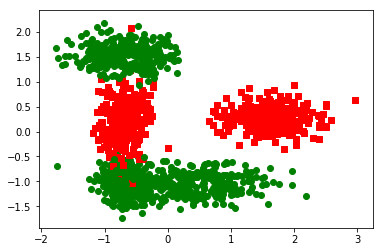

In [3]:
for i in range(m): 
    a = X[i][0]
    b = X[i][1]
    cls = int(y[i][0])
    plt.scatter(a, b, marker=MARKERS[cls], color=COLORS[cls])
plt.show()

In [4]:
es = ES(X=X, y=y, MU=5, LAMBDA=35, ngen=20, circles=4, problem='classification')
my_rbf = es.train()

start training
gen	nevals	avg    	std    	min   	max    
0  	5     	20.9239	4.09852	14.468	27.2554
1  	35    	19.0551	4.4265 	11.2456	23.0331
2  	35    	15.8961	8.22896	6.07299	30.5857
3  	35    	15.4626	4.79375	7.21376	20.3839
4  	35    	12.2121	8.35403	5.36084	26.7626
5  	35    	12.0465	7.05637	5.36084	23.8707
6  	35    	15.439 	8.923  	7.2881 	28.0586
7  	35    	23.8886	5.11367	17.7632	32.7471
8  	35    	20.7162	3.3356 	15.7408	24.4073
9  	35    	24.2987	1.93456	21.3975	26.9193
10 	35    	23.2473	2.21906	21.3975	26.9193
11 	35    	24.6908	4.5429 	20.2518	33.1592
12 	35    	24.1335	3.10425	20.9937	29.5656
13 	35    	22.1759	1.23043	20.4537	24.0857
14 	35    	21.558 	0.843511	20.4537	22.6069
15 	35    	20.6833	0.28831 	20.4537	21.128 
16 	35    	20.4541	0.00051008	20.4537	20.4548
17 	35    	20.4406	0.0267974 	20.387 	20.4546
18 	35    	20.4404	0.0267339 	20.3869	20.4539
19 	35    	20.4537	8.32243e-05	20.4536	20.4538
20 	35    	20.4404	0.0266892  	20.387 	20.4538
best individual's erro

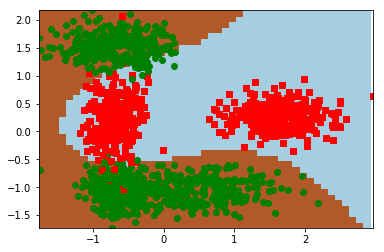

In [5]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
x_range = np.arange(x_min, x_max, 0.1)
y_range = np.arange(y_min, y_max, 0.1)
xx, yy = np.meshgrid(x_range, y_range)
cmap = plt.get_cmap('Paired')
zz = np.zeros(xx.shape)

for i in range(zz.shape[0]):
    for j in range(zz.shape[1]):
        x_vector = np.array([xx[i][j], yy[i][j]])
        network_answer = my_rbf.apply_network(x_vector)
        cls = np.argmax(network_answer)
        zz[i][j] = int(cls)

plt.pcolormesh(xx, yy, zz, cmap=cmap)

for i in range(m): 
    a = X[i][0]
    b = X[i][1]
    cls = int(y[i][0])
    plt.scatter(a, b, marker=MARKERS[cls], color=COLORS[cls])
plt.show()

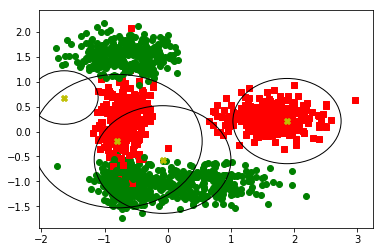

In [19]:
fig, ax = plt.subplots()
for i in range(X.shape[0]): 
    a = X[i][0]
    b = X[i][1]
    cls = int(y[i][0])
    plt.scatter(a, b, marker=MARKERS[cls], color=COLORS[cls])
for v in my_rbf.V: 
    plt.scatter(v[0], v[1], marker=MARKERS[-3], color=COLORS[-1])
    
V = my_rbf.V
gamma = my_rbf.gamma
for k in range(gamma.shape[0]):
    c1 = V[k][0]
    c2 = V[k][1]
    r = gamma[k][0] * 10
    cir = plt.Circle((c1, c2), r, facecolor="None", edgecolor="k")
    ax.add_artist(cir)
plt.show()

In [7]:
dataset_size = X.shape[0]
correct = 0
for i in range(dataset_size): 
    actual_class = int(y[i][0])
    predicted_class = int(np.argmax(my_rbf.apply_network(X[i])))
    if actual_class == predicted_class:
        correct += 1
print('Training Accuracy: %{0}'.format(100 * correct / dataset_size))

Training Accuracy: %97.4


In [8]:
test_points = np.loadtxt('2clstest5000.csv', delimiter=',')
m_test = test_points.shape[0]
n_test = test_points.shape[1] - 1
X_test = test_points[:, :n]
y_test = test_points[:, n:]
y_test[y_test == -1] = 0

X_test = preprocessing.scale(X_test)

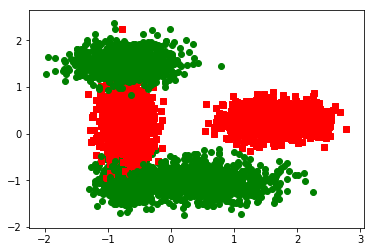

In [9]:
for i in range(m_test): 
    a = X_test[i][0]
    b = X_test[i][1]
    cls = int(y_test[i][0])
    plt.scatter(a, b, marker=MARKERS[cls], color=COLORS[cls])
plt.show()

In [10]:
test_size = m_test
correct = 0
for i in range(test_size): 
    actual_class = int(y_test[i][0])
    predicted_class = int(np.argmax(my_rbf.apply_network(X_test[i])))
    if actual_class == predicted_class:
        correct += 1
print('Test Accuracy: %{0}'.format(100 * correct / test_size))

Test Accuracy: %97.04


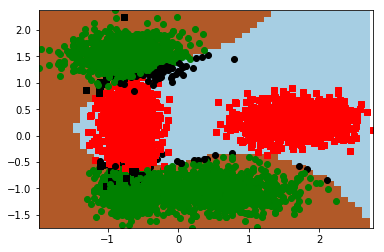

In [11]:
x_min, x_max = X_test[:, 0].min() , X_test[:, 0].max() 
y_min, y_max = X_test[:, 1].min() , X_test[:, 1].max() 
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
x_range = np.arange(x_min, x_max, 0.1)
y_range = np.arange(y_min, y_max, 0.1)
xx, yy = np.meshgrid(x_range, y_range)
cmap = plt.get_cmap('Paired')
zz = np.zeros(xx.shape)

for i in range(zz.shape[0]):
    for j in range(zz.shape[1]):
        x_vector = np.array([xx[i][j], yy[i][j]])
        network_answer = my_rbf.apply_network(x_vector)
        cls = np.argmax(network_answer)
        zz[i][j] = int(cls)

plt.pcolormesh(xx, yy, zz, cmap=cmap)



test_size = m_test
correct = 0
for i in range(m_test): 
    actual_class = int(y_test[i][0])
    predicted_class = int(np.argmax(my_rbf.apply_network(X_test[i])))
    
    a = X_test[i][0]
    b = X_test[i][1]
    
    if actual_class != predicted_class:
        plt.scatter(a, b, marker=MARKERS[actual_class], color='k')

    else:
        plt.scatter(a, b, marker=MARKERS[actual_class], color=COLORS[actual_class])

        